In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [36]:
imaging_data = pd.read_csv("toy_data_imaging.csv")
imaging_minimal = imaging_data.iloc[:,2:]
print(y)
y = imaging_data.iloc[:,1]


0      -1.0
1      -1.0
2      -1.0
3      -1.0
4      -1.0
       ... 
1795    1.0
1796    1.0
1797    1.0
1798    1.0
1799    1.0
Name: diagnosis, Length: 1800, dtype: float64
range(-2, 2)


[0.09564559 0.06882265]
[[-0.60566513  0.07269842]
 [-0.53009271 -0.1105349 ]
 [-0.55115973 -0.17241884]
 ...
 [ 0.16343098  0.02571888]
 [ 0.92047948  0.13546029]
 [ 0.48383664  0.15166097]]


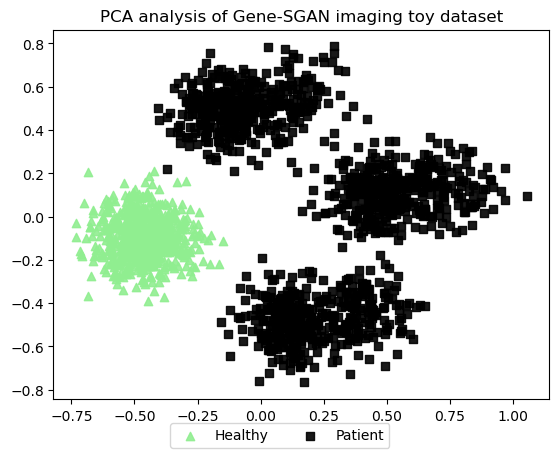

In [45]:
fig, ax = plt.subplots()
# PCA
pca = PCA(n_components=2,random_state=42)

pca_result = pca.fit_transform(imaging_minimal)
print(pca.explained_variance_ratio_)
print(pca_result)


for l, c, m in zip([-1,1], ["lightgreen", "black"], ('^', 's')):
    ax.scatter(pca_result[y == l, 0],
                pca_result[y == l, 1],
                color=c,
                label='cluster %s' % l,
                alpha=0.9,
                marker=m
                )

plt.title("PCA analysis of Gene-SGAN imaging toy dataset")
labels = ["Healthy","Patient"]
fig.legend(labels, loc='lower center',ncol=len(labels))